In [1]:
from pathlib import Path
import random
import shutil

import cv2

from src.loading import load_dataset_subset
from src.visualization import preview_sequence_grid
from src.augmentation import apply_dirty_effect

TRACKING_ROOT = Path.cwd()
DETRAC_ROOT = TRACKING_ROOT / "DETRAC_Upload"
MIXED_ROOT = TRACKING_ROOT / "DETRAC_mixed_50_50"
ARCHIVE_ROOT = TRACKING_ROOT / "archive"

print("TRACKING_ROOT:", TRACKING_ROOT)
print("DETRAC_ROOT existe:", DETRAC_ROOT.exists())
print("MIXED_ROOT existe:", MIXED_ROOT.exists())
print("ARCHIVE_ROOT existe:", ARCHIVE_ROOT.exists())

TRACKING_ROOT: c:\Users\bianc\Vision\tpf\tracking
DETRAC_ROOT existe: True
MIXED_ROOT existe: True
ARCHIVE_ROOT existe: True


In [2]:
subset_clean = load_dataset_subset(
    base_dir=DETRAC_ROOT,
    split="train",
    percent=5.0,   # subí/bajá esto según quieras
    shuffle=True,
)

clean_image_paths = subset_clean["image_paths"]
clean_label_paths = subset_clean["label_paths"]

len(clean_image_paths), clean_image_paths[0]

Total imágenes en train: 82085 | Usando: 4104 (5.0%)


(4104,
 WindowsPath('c:/Users/bianc/Vision/tpf/tracking/DETRAC_Upload/images/train/MVI_40131_img01589.jpg'))

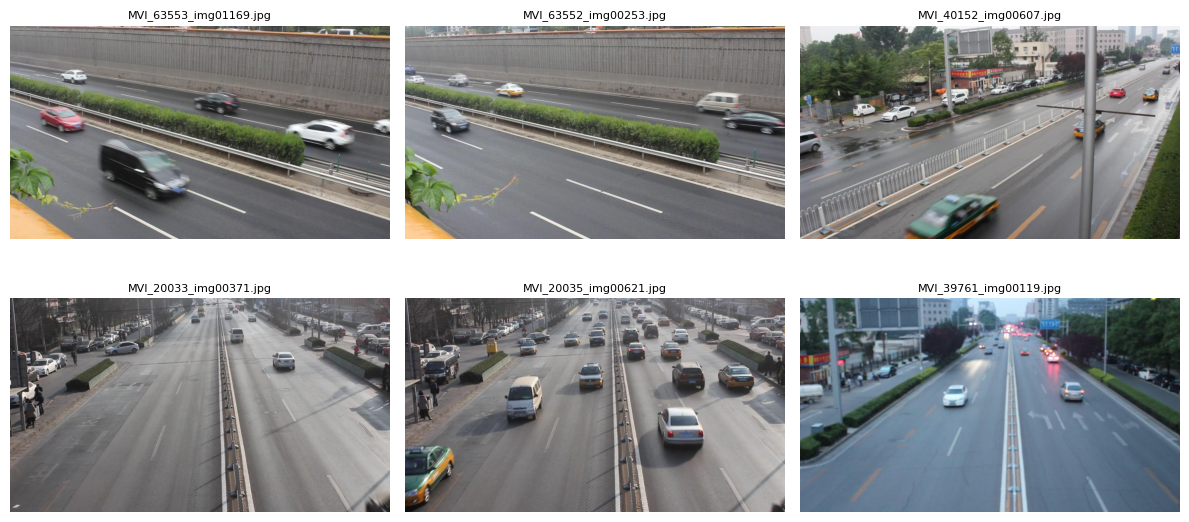

In [3]:
preview_sequence_grid(
    image_paths=clean_image_paths,
    sequence_filter=None,   # o "MVI_20011" si querés una secuencia fija
    n_rows=2,
    n_cols=3,
    random_sample=True,
)


In [4]:
MIXED_IMAGES_DIR = MIXED_ROOT / "images"
MIXED_LABELS_DIR = MIXED_ROOT / "labels"

MIXED_IMAGES_DIR.mkdir(parents=True, exist_ok=True)
MIXED_LABELS_DIR.mkdir(parents=True, exist_ok=True)

indices = list(range(len(clean_image_paths)))
random.shuffle(indices)

n_dirty = len(indices) // 2
dirty_idx = set(indices[:n_dirty])
clean_idx = set(indices[n_dirty:])

print("Total:", len(indices), "| dirty:", len(dirty_idx), "| clean:", len(clean_idx))

mixed_image_paths = []

for i, (img_path, lbl_path) in enumerate(zip(clean_image_paths, clean_label_paths)):
    out_img = MIXED_IMAGES_DIR / img_path.name
    out_lbl = MIXED_LABELS_DIR / lbl_path.name

    img = cv2.imread(str(img_path))
    if img is None:
        continue

    if i in dirty_idx:
        img_out = apply_dirty_effect(img, strength=0.6)
        cv2.imwrite(str(out_img), img_out)
    else:
        shutil.copy2(img_path, out_img)

    shutil.copy2(lbl_path, out_lbl)
    mixed_image_paths.append(out_img)

len(mixed_image_paths)


Total: 4104 | dirty: 2052 | clean: 2052


4104

Total imágenes en all: 7290 | Usando: 7290 (100.0%)


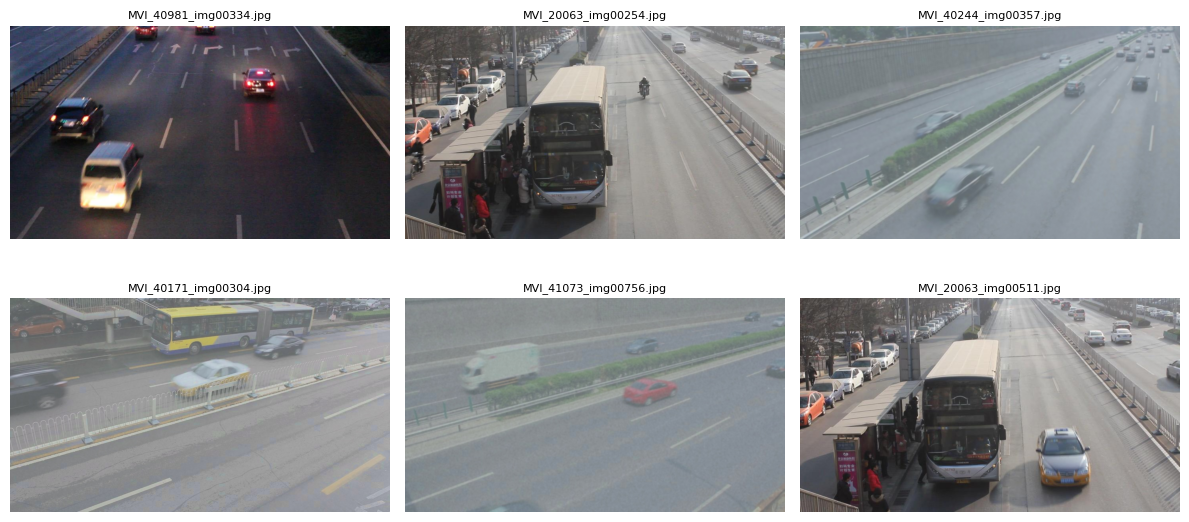

In [5]:
subset_mixed = load_dataset_subset(
    base_dir=MIXED_ROOT,
    split=None,
    images_subdir="images",
    labels_subdir="labels",
    percent=100.0,
    shuffle=True,
)

mixed_image_paths = subset_mixed["image_paths"]

preview_sequence_grid(
    image_paths=mixed_image_paths,
    sequence_filter=None,
    n_rows=2,
    n_cols=3,
    random_sample=True,
)


Total imágenes en all: 1027 | Usando: 1027 (100.0%)


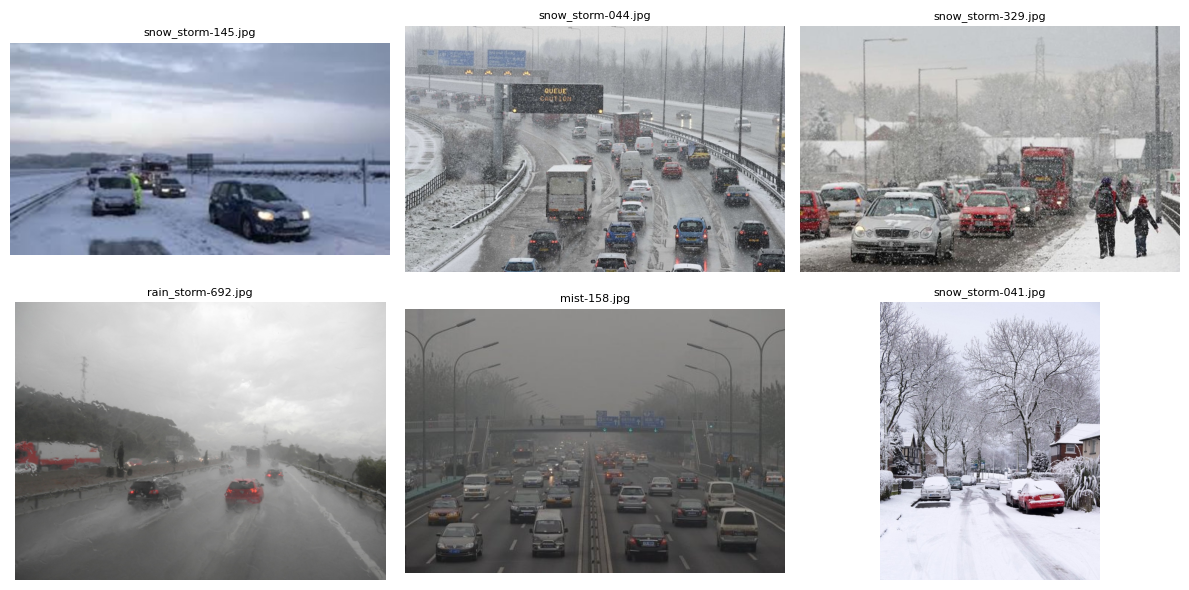

In [6]:
subset_archive = load_dataset_subset(
    base_dir=ARCHIVE_ROOT,
    split=None,
    images_subdir="images",
    labels_subdir="labels",
    percent=100.0,
    shuffle=True,
)

archive_image_paths = subset_archive["image_paths"]

preview_sequence_grid(
    image_paths=archive_image_paths,
    sequence_filter=None,
    n_rows=2,
    n_cols=3,
    random_sample=True,
)
